# Quantiles and Chebyshev's inequality

The provided code consists of two functions: `chebyshev_bound`, which calculates lower and upper bounds using Chebyshev's inequality for a given dataset and confidence level, and `plot_quantile_comparison`, which generates a plot to compare quantiles of different random variables. The `chebyshev_bound` function calculates the sample mean and standard deviation of the data, and then determines the bounds based on the confidence level using Chebyshev's inequality. The `plot_quantile_comparison` function sorts the data, computes quantiles using the standard normal distribution's cumulative distribution function, and plots the quantiles against the sorted data for each random variable. The code generates three random variables (normal, uniform, and exponential) and calculates quantiles for each. The resulting plot allows visual comparison of quantile behavior across the random variables. The x-axis represents sorted data, while the y-axis displays quantiles. Each curve in the plot corresponds to a different random variable, with the legend providing the corresponding label. The grid facilitates accurate quantile comparisons.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

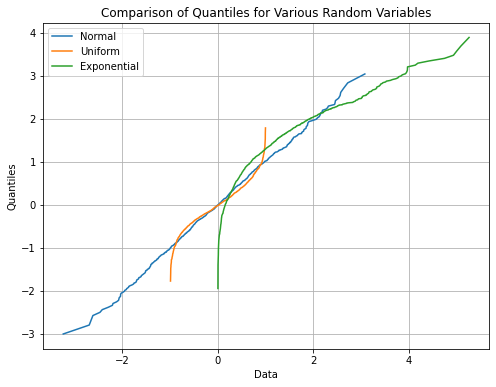

In [5]:
def chebyshev_bound(data, confidence):
    mean = np.mean(data)
    std = np.std(data)
    k = 1 / np.sqrt(confidence)
    lower_bound = mean - k * std
    upper_bound = mean + k * std
    return lower_bound, upper_bound

def plot_quantile_comparison(data_list, labels):
    plt.figure(figsize=(8, 6))
    for data, label in zip(data_list, labels):
        sorted_data = np.sort(data)
        n = len(sorted_data)
        probabilities = np.arange(1, n + 1) / n
        quantiles = norm.ppf(probabilities, loc=np.mean(data), scale=np.std(data))
        plt.plot(sorted_data, quantiles, label=label)
    plt.xlabel('Data')
    plt.ylabel('Quantiles')
    plt.title('Comparison of Quantiles for Various Random Variables')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate various random variables for comparison
np.random.seed(42)  # For reproducibility
size = 1000  # Number of samples for each random variable

normal_data = np.random.normal(loc=0, scale=1, size=size)
uniform_data = np.random.uniform(low=-1, high=1, size=size)
exponential_data = np.random.exponential(scale=1, size=size)

# Calculate the quantiles for each random variable
data_list = [normal_data, uniform_data, exponential_data]
labels = ['Normal', 'Uniform', 'Exponential']

# Plot the comparison of quantiles using Chebyshev's inequality
plot_quantile_comparison(data_list, labels)